In [1]:
import os

# Step 1: Setup and Imports

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import truncnorm, norm, skewnorm
sns.set(style="whitegrid")

title_font = 18
labels_font = 16
text_font = 14
tick_font = 12
images_dir = "../images/evaluation_2"

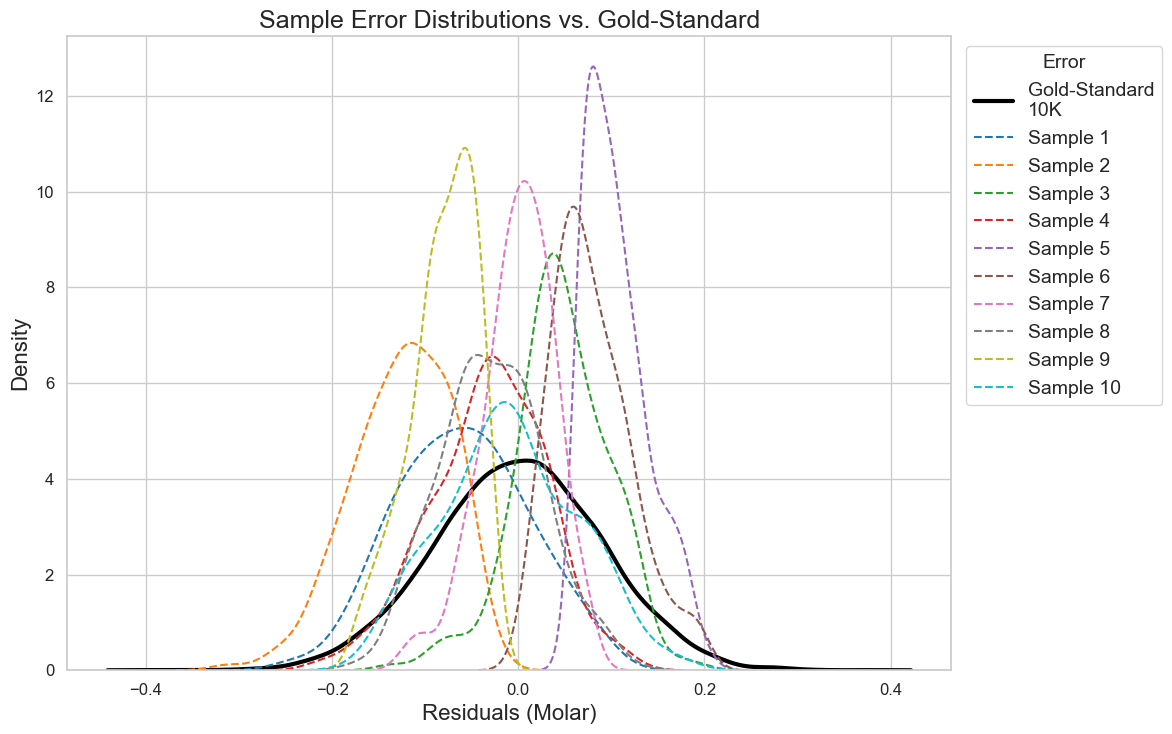

In [2]:
np.random.seed(40)
mu_gold_error = 0
sigma_gold_error = 0.09
gold_standard_test_size = 10000
model_true_performance = np.random.normal(loc=mu_gold_error, scale=sigma_gold_error, size=gold_standard_test_size)

num_samples = 10
sample_size = 200
value_bounds = (-0.35, 0.35)
mean_bounds = (-0.08, 0.08)

samples = []
labels = []

for i in range(num_samples):
    # Randomly select a mean bounds specified above
    mean = np.random.uniform(mean_bounds[0], mean_bounds[1])
    
    # Randomly decide distribution type
    dist_type = np.random.choice(['normal', 'skewed', 'bimodal'])

    if dist_type == 'normal':
        scale = np.random.uniform(0.05, 0.08)
        a, b = (value_bounds[0] - mean) / scale, (value_bounds[1] - mean) / scale
        data = truncnorm(a, b, loc=mean, scale=scale).rvs(sample_size)
        label = f"Sample {i+1}"

    elif dist_type == 'skewed':
        skew = np.random.choice([-10, -5, -3,  3, 5, 10])
        scale = np.random.uniform(0.05, 0.08)
        data = skewnorm(a=skew, loc=mean, scale=scale).rvs(sample_size)
        data = np.clip(data, *value_bounds)
        label = f"Sample {i+1}"

    else:  # bimodal
        offset = np.random.uniform(0.05, 0.08)
        mean1 = mean - offset / 2
        mean2 = mean + offset / 2
        scale = np.random.uniform(0.03, 0.06)
        a1, b1 = (value_bounds[0] - mean1) / scale, (value_bounds[1] - mean1) / scale
        a2, b2 = (value_bounds[0] - mean2) / scale, (value_bounds[1] - mean2) / scale
        half = sample_size // 2
        data1 = truncnorm(a1, b1, loc=mean1, scale=scale).rvs(half)
        data2 = truncnorm(a2, b2, loc=mean2, scale=scale).rvs(sample_size - half)
        data = np.concatenate([data1, data2])
        label = f"Sample {i+1}"

    samples.append(data)
    labels.append(label)

# Plotting all generated samples over gold-standard
plt.figure(figsize=(12, 7.5))
sns.kdeplot(model_true_performance, label=f"Gold-Standard\n{gold_standard_test_size/1000:.0f}K", linewidth=3, color='black')

colors = plt.cm.tab10(np.linspace(0, 1, num_samples))
for i, (sample, label) in enumerate(zip(samples, labels)):
    sns.kdeplot(sample, label=label, linestyle='--', color=colors[i])

plt.title("Sample Error Distributions vs. Gold-Standard", fontsize=title_font)
plt.xlabel("Residuals (Molar)", fontsize=labels_font)
plt.ylabel("Density", fontsize=labels_font)
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1), title="Error", title_fontsize=text_font, fontsize=text_font)
plt.tick_params(axis='both', labelsize=tick_font)
plt.tight_layout()

plt.savefig(os.path.join(images_dir, 'sampling_uncertainty.png'))
plt.show()


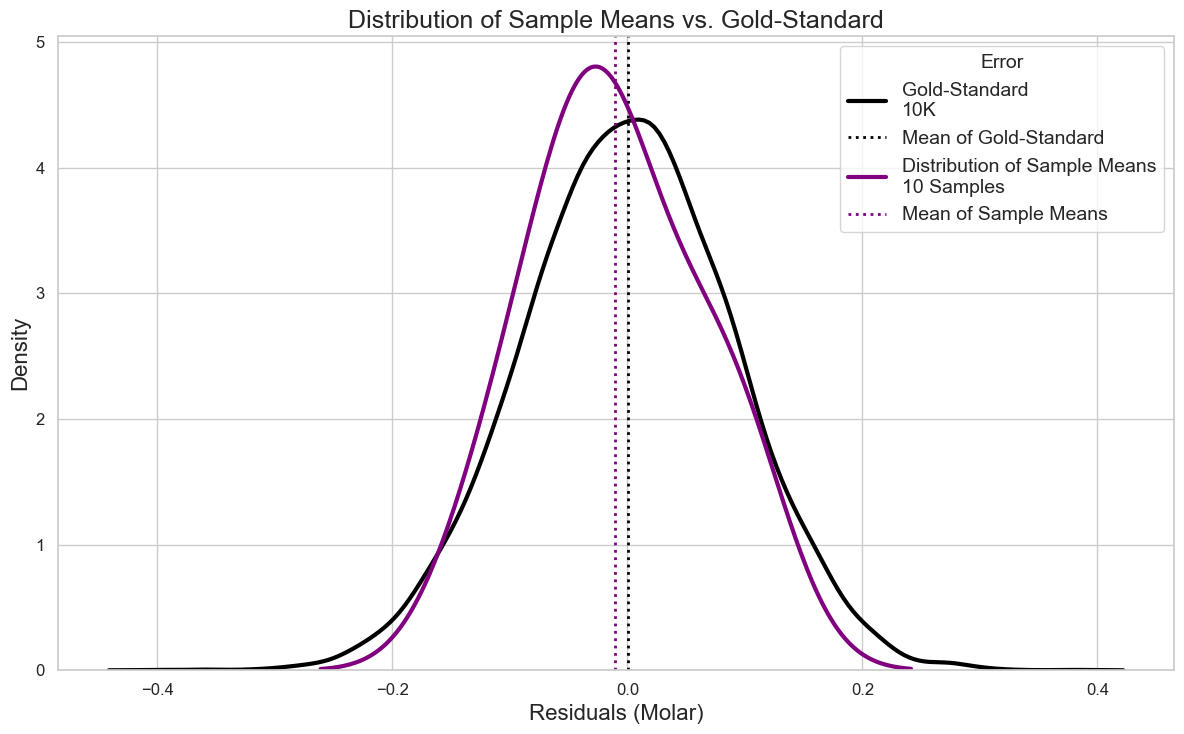

In [3]:
# Calculate the mean of each sample
sample_means = np.array([np.mean(sample) for sample in samples])

# Compute the mean of each distribution
mean_gold = model_true_performance.mean()
mean_sample_means = sample_means.mean()

# Plotting the distribution of sample means vs. gold-standard performance
plt.figure(figsize=(12, 7.5))
sns.kdeplot(model_true_performance, label=f"Gold-Standard\n{gold_standard_test_size/1000:.0f}K", linewidth=3, color='black')
plt.axvline(mean_gold, color='black', linestyle=':', linewidth=2, label='Mean of Gold-Standard')

sns.kdeplot(sample_means, label=f"Distribution of Sample Means\n{len(sample_means)} Samples", linewidth=3, color='purple')
plt.axvline(mean_sample_means, color='purple', linestyle=':', linewidth=2, label='Mean of Sample Means')

plt.title("Distribution of Sample Means vs. Gold-Standard", fontsize=title_font)
plt.xlabel("Residuals (Molar)", fontsize=labels_font)
plt.ylabel("Density", fontsize=labels_font)
plt.legend(loc='upper right', title="Error", title_fontsize=text_font, fontsize=text_font)
plt.tick_params(axis='both', labelsize=tick_font)
plt.tight_layout()

plt.savefig(os.path.join(images_dir, 'sample_means_vs_population.png'))
plt.show()

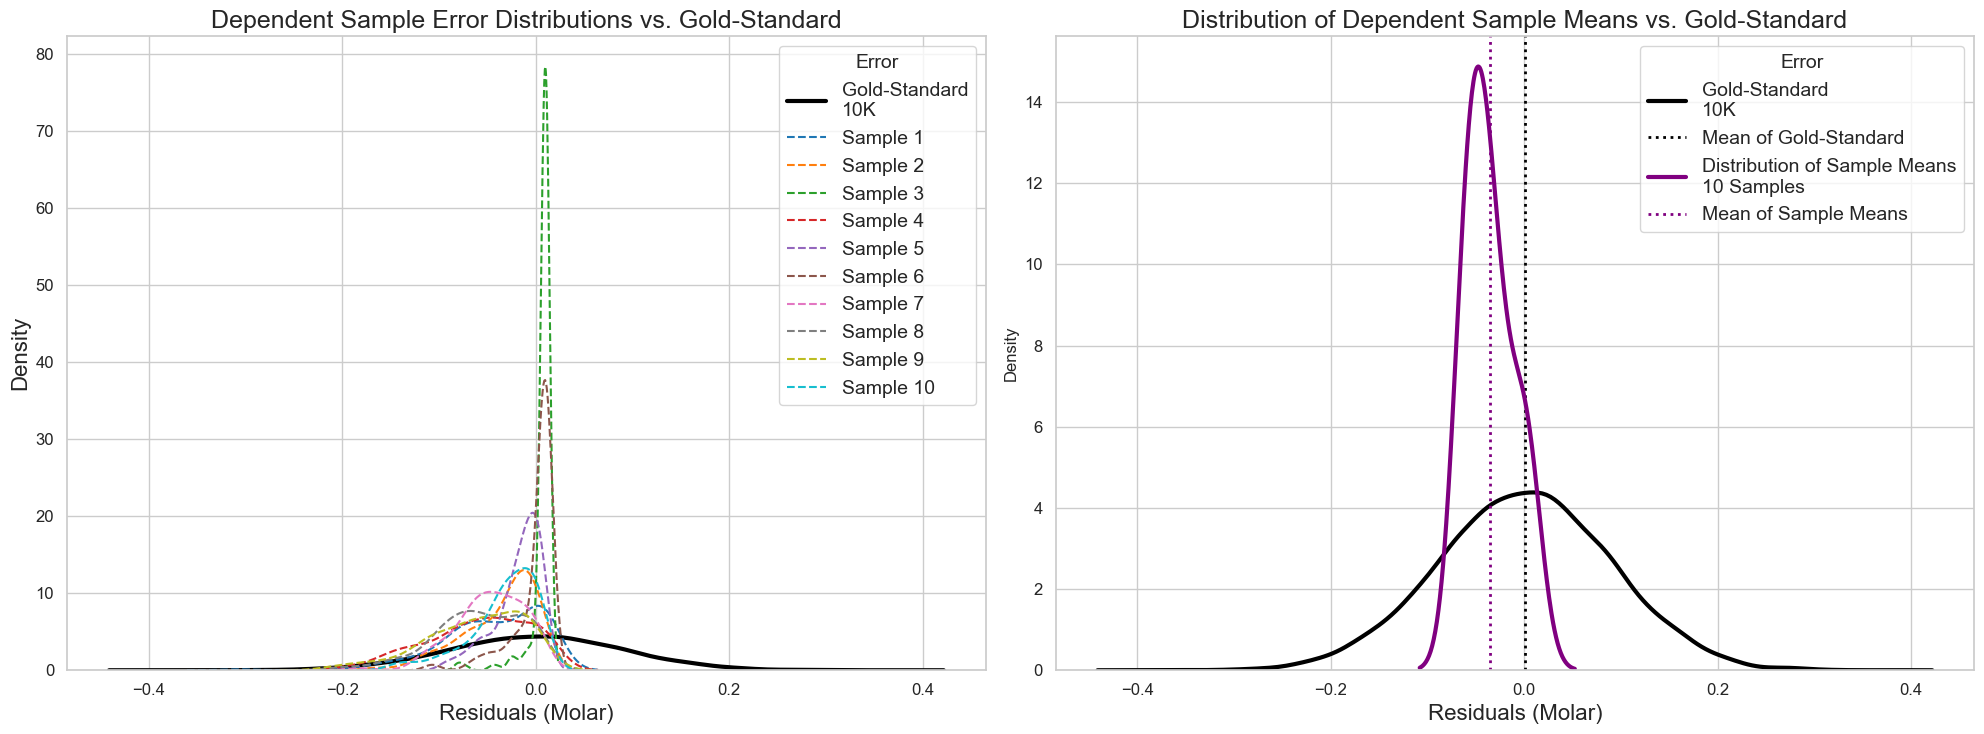

In [4]:
np.random.seed(40)

num_samples = 10
sample_size = 200

# bias the boundaries of where the error will be drawn from. This will make the predictions of all 10 samples clustered in a single are
value_bounds = (-0.35, 0.01)
mean_bounds = (-0.08, 0.08)

samples = []
labels = []

for i in range(num_samples):
    # Randomly select a mean bounds specified above
    mean = np.random.uniform(mean_bounds[0], mean_bounds[1])
    
    # Randomly decide distribution type
    dist_type = np.random.choice(['normal', 'skewed', 'bimodal'])

    if dist_type == 'normal':
        scale = np.random.uniform(0.05, 0.08)
        a, b = (value_bounds[0] - mean) / scale, (value_bounds[1] - mean) / scale
        data = truncnorm(a, b, loc=mean, scale=scale).rvs(sample_size)
        label = f"Sample {i+1}"

    elif dist_type == 'skewed':
        skew = np.random.choice([-0.5, -1,  0.5, 1])
        scale = np.random.uniform(0.05, 0.08)
        data = skewnorm(a=skew, loc=mean, scale=scale).rvs(sample_size)
        data = np.clip(data, *value_bounds)
        label = f"Sample {i+1}"

    else:  # bimodal
        offset = np.random.uniform(0.05, 0.08)
        mean1 = mean - offset / 2
        mean2 = mean + offset / 2
        scale = np.random.uniform(0.03, 0.06)
        a1, b1 = (value_bounds[0] - mean1) / scale, (value_bounds[1] - mean1) / scale
        a2, b2 = (value_bounds[0] - mean2) / scale, (value_bounds[1] - mean2) / scale
        half = sample_size // 2
        data1 = truncnorm(a1, b1, loc=mean1, scale=scale).rvs(half)
        data2 = truncnorm(a2, b2, loc=mean2, scale=scale).rvs(sample_size - half)
        data = np.concatenate([data1, data2])
        label = f"Sample {i+1}"

    samples.append(data)
    labels.append(label)

fig, axs = plt.subplots(1, 2, figsize=(20, 7.5))

# --- Plot 1: Individual Small Samples vs. Gold Standard ---
sns.kdeplot(model_true_performance, label=f"Gold-Standard\n{gold_standard_test_size/1000:.0f}K",
            linewidth=3, color='black', ax=axs[0])

colors = plt.cm.tab10(np.linspace(0, 1, num_samples))
for i, (sample, label) in enumerate(zip(samples, labels)):
    sns.kdeplot(sample, label=label, linestyle='--', color=colors[i], ax=axs[0])

axs[0].set_title("Dependent Sample Error Distributions vs. Gold-Standard", fontsize=title_font)
axs[0].set_xlabel("Residuals (Molar)", fontsize=labels_font)
axs[0].set_ylabel("Density", fontsize=labels_font)
axs[0].legend(loc='upper right', title="Error", title_fontsize=text_font, fontsize=text_font)
axs[0].tick_params(axis='both', labelsize=tick_font)

# --- Plot 2: Distribution of Sample Means vs. Gold Standard ---
sample_means = np.array([np.mean(sample) for sample in samples])
mean_gold = model_true_performance.mean()
mean_sample_means = sample_means.mean()

sns.kdeplot(model_true_performance, label=f"Gold-Standard\n{gold_standard_test_size/1000:.0f}K",
            linewidth=3, color='black', ax=axs[1])
axs[1].axvline(mean_gold, color='black', linestyle=':', linewidth=2, label='Mean of Gold-Standard')
sns.kdeplot(sample_means, label=f"Distribution of Sample Means\n{len(sample_means)} Samples",
            linewidth=3, color='purple', ax=axs[1])
axs[1].axvline(mean_sample_means, color='purple', linestyle=':', linewidth=2, label='Mean of Sample Means')

axs[1].set_title("Distribution of Dependent Sample Means vs. Gold-Standard", fontsize=title_font)
axs[1].set_xlabel("Residuals (Molar)", fontsize=labels_font)
axs[1].legend(loc='upper right', title="Error", title_fontsize=text_font, fontsize=text_font)
axs[1].tick_params(axis='both', labelsize=tick_font)

# --- Final layout and save ---
plt.tight_layout()
plt.savefig(os.path.join(images_dir, 'merged_dependant_distributions.png'))
plt.show()

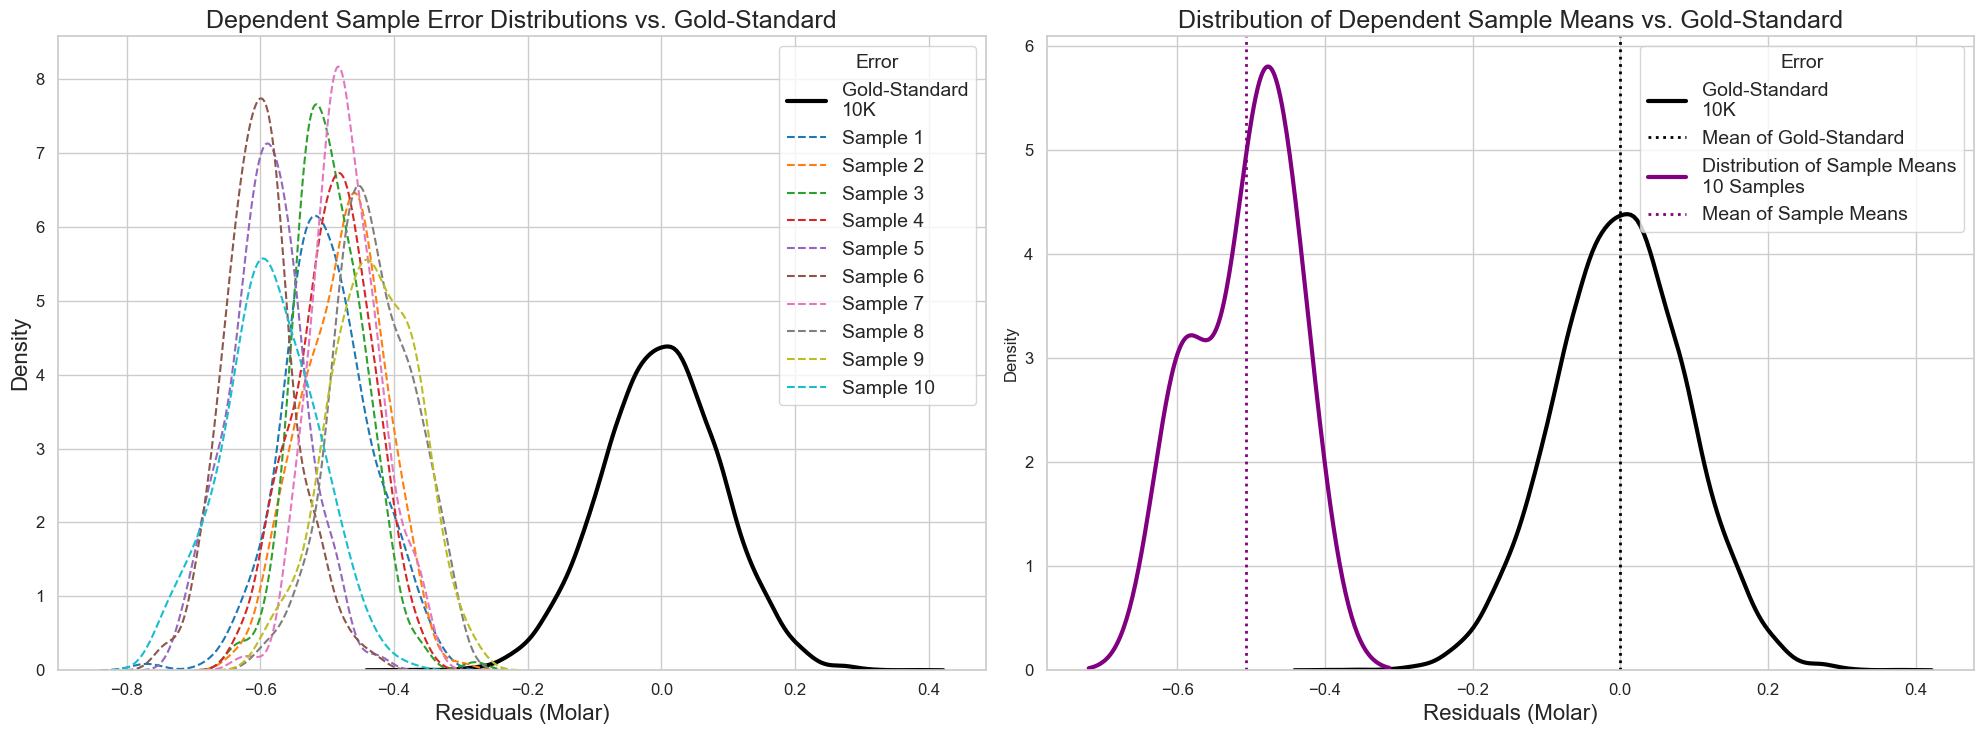

In [5]:
np.random.seed(40)

num_samples = 10
sample_size = 200

# bias the boundaries of where the error will be drawn from. This will make the predictions of all 10 samples clustered in a single are
value_bounds = (-0.77, -0.23)
mean_bounds = (-0.4, -0.6)

samples = []
labels = []

for i in range(num_samples):
    # Randomly select a mean bounds specified above
    mean = np.random.uniform(mean_bounds[0], mean_bounds[1])
    
    # Randomly decide distribution type
    dist_type = np.random.choice(['normal', 'skewed', 'bimodal'])

    if dist_type == 'normal':
        scale = np.random.uniform(0.05, 0.08)
        a, b = (value_bounds[0] - mean) / scale, (value_bounds[1] - mean) / scale
        data = truncnorm(a, b, loc=mean, scale=scale).rvs(sample_size)
        label = f"Sample {i+1}"

    elif dist_type == 'skewed':
        skew = np.random.choice([-0.5, -1,  0.5, 1])
        scale = np.random.uniform(0.05, 0.08)
        data = skewnorm(a=skew, loc=mean, scale=scale).rvs(sample_size)
        data = np.clip(data, *value_bounds)
        label = f"Sample {i+1}"

    else:  # bimodal
        offset = np.random.uniform(0.05, 0.08)
        mean1 = mean - offset / 2
        mean2 = mean + offset / 2
        scale = np.random.uniform(0.03, 0.06)
        a1, b1 = (value_bounds[0] - mean1) / scale, (value_bounds[1] - mean1) / scale
        a2, b2 = (value_bounds[0] - mean2) / scale, (value_bounds[1] - mean2) / scale
        half = sample_size // 2
        data1 = truncnorm(a1, b1, loc=mean1, scale=scale).rvs(half)
        data2 = truncnorm(a2, b2, loc=mean2, scale=scale).rvs(sample_size - half)
        data = np.concatenate([data1, data2])
        label = f"Sample {i+1}"

    samples.append(data)
    labels.append(label)

fig, axs = plt.subplots(1, 2, figsize=(20, 7.5))

# --- Plot 1: Individual Small Samples vs. Gold Standard ---
sns.kdeplot(model_true_performance, label=f"Gold-Standard\n{gold_standard_test_size/1000:.0f}K",
            linewidth=3, color='black', ax=axs[0])

colors = plt.cm.tab10(np.linspace(0, 1, num_samples))
for i, (sample, label) in enumerate(zip(samples, labels)):
    sns.kdeplot(sample, label=label, linestyle='--', color=colors[i], ax=axs[0])

axs[0].set_title("Dependent Sample Error Distributions vs. Gold-Standard", fontsize=title_font)
axs[0].set_xlabel("Residuals (Molar)", fontsize=labels_font)
axs[0].set_ylabel("Density", fontsize=labels_font)
axs[0].legend(loc='upper right', title="Error", title_fontsize=text_font, fontsize=text_font)
axs[0].tick_params(axis='both', labelsize=tick_font)

# --- Plot 2: Concatenated Samples vs. Gold Standard ---
sample_means = np.array([np.mean(sample) for sample in samples])
mean_gold = model_true_performance.mean()
mean_sample_means = sample_means.mean()

sns.kdeplot(model_true_performance, label=f"Gold-Standard\n{gold_standard_test_size/1000:.0f}K",
            linewidth=3, color='black', ax=axs[1])
axs[1].axvline(mean_gold, color='black', linestyle=':', linewidth=2, label='Mean of Gold-Standard')
sns.kdeplot(sample_means, label=f"Distribution of Sample Means\n{len(sample_means)} Samples",
            linewidth=3, color='purple', ax=axs[1])
axs[1].axvline(mean_sample_means, color='purple', linestyle=':', linewidth=2, label='Mean of Sample Means')

axs[1].set_title("Distribution of Dependent Sample Means vs. Gold-Standard", fontsize=title_font)
axs[1].set_xlabel("Residuals (Molar)", fontsize=labels_font)
axs[1].legend(loc='upper right', title="Error", title_fontsize=text_font, fontsize=text_font)
axs[1].tick_params(axis='both', labelsize=tick_font)

# --- Final layout and save ---
plt.tight_layout()
plt.savefig(os.path.join(images_dir, 'merged_OOD_distributions.png'))
plt.show()

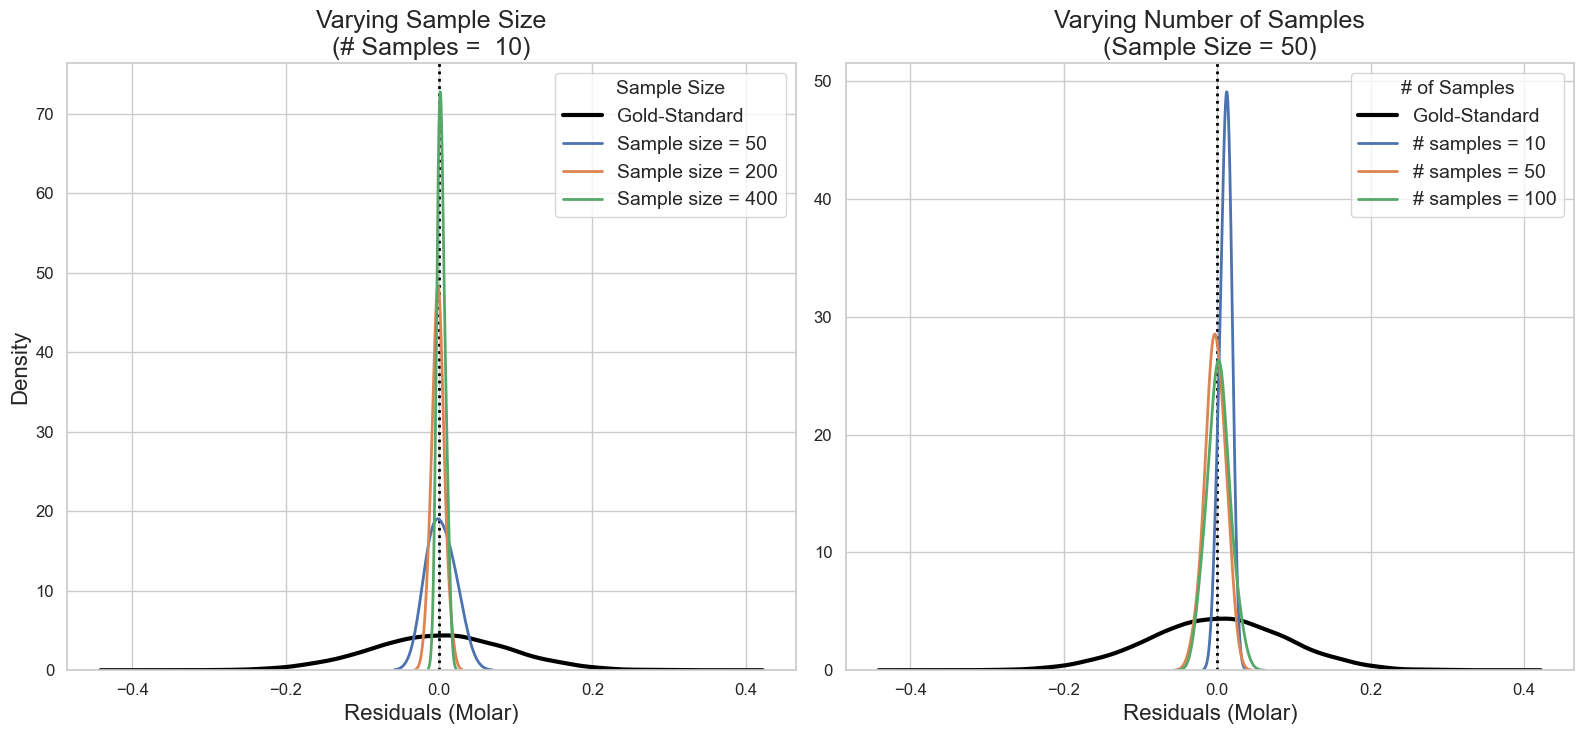

In [6]:
np.random.seed(40)

# Parameters
sample_sizes = [50, 200, 400]         # Varying sample sizes
num_samples_fixed = 10                            # Fixed number of samples for left subplot
num_samples_list = [10, 50, 100]       # Varying number of samples for right subplot
fixed_sample_size = 50                             # Fixed sample size for right subplot

# Compute the mean of the gold-standard distribution
mean_gold = model_true_performance.mean()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 7.5))

# === Left Plot: Varying Sample Size ===
ax = axes[0]
sns.kdeplot(model_true_performance, linewidth=3, color='black', label='Gold-Standard', ax=ax, bw_adjust=1)
ax.axvline(mean_gold, color='black', linestyle=':', linewidth=2)

for sample_size in sample_sizes:
    sample_means = [
        np.mean(np.random.choice(model_true_performance, size=sample_size, replace=True))
        for _ in range(num_samples_fixed)
    ]
    sns.kdeplot(sample_means, linewidth=2, label=f"Sample size = {sample_size}", ax=ax, bw_adjust=1.5)

ax.set_title(f"Varying Sample Size\n(# Samples =  {num_samples_fixed})", fontsize=title_font)
ax.set_xlabel("Residuals (Molar)", fontsize=labels_font)
ax.set_ylabel("Density", fontsize=labels_font)
ax.legend(title="Sample Size", fontsize=text_font, title_fontsize=text_font)
ax.tick_params(axis='both', labelsize=tick_font)

# === Right Plot: Varying Number of Samples ===
ax = axes[1]
sns.kdeplot(model_true_performance, linewidth=3, color='black', label='Gold-Standard', ax=ax, bw_adjust=1)
ax.axvline(mean_gold, color='black', linestyle=':', linewidth=2)

for num_samples in num_samples_list:
    sample_means = [
        np.mean(np.random.choice(model_true_performance, size=fixed_sample_size, replace=True))
        for _ in range(num_samples)
    ]
    sns.kdeplot(sample_means, linewidth=2, label=f"# samples = {num_samples}", ax=ax, bw_adjust=1.5)

ax.set_title(f"Varying Number of Samples\n(Sample Size = {fixed_sample_size})", fontsize=title_font)
ax.set_xlabel("Residuals (Molar)", fontsize=labels_font)
ax.set_ylabel("")  # Avoid duplicate y-axis label
ax.legend(title="# of Samples", fontsize=text_font, title_fontsize=text_font)
ax.tick_params(axis='both', labelsize=tick_font)

# Final layout
plt.tight_layout()
plt.savefig(os.path.join(images_dir, 'sample_means_size_vs_num.png'))
plt.show()
